# Software Testing, Automation and the Job Market - a Data Programming Project

### Research Questions, Project Limitations and Motivation 

#### Research Area
The goal of this project is to analyse a given dataset from a large job board in regards to software testing roles with the emphasis of the analysis placed on what the most sought for skills are in order to shed some light on the ongoing debate on whether automation testing is going to replace manual testing (e.g __[Can Manual Testing Be Completely Replaced by Automation Testing?](https://blog.qasource.com/resources/can-manual-testing-be-completely-replaced-by-automation-testing)__). 

#### Research Questions
More specifically, this project aims to answer the following questions:

* What are the most popular skills required for prospective software testers?
* Which programming languages are the most popular for test automation?

One caveat that has to be considered; however, is that the research questions may change depending on the final data set. 

#### Future Work / Project Limitations 

Some questions that are interesting, but are out of scope for this project are the the ones below:

* How many job adverts mention a combination of manual and test automation both in their description?
* How many job descriptions mention training / upskilling?
* How many jobs exclusively focus on either manual or automation?

The reason why these problems are out of scope is because the data set used in this project is limited in terms of geographical region. Additionally, for the questions listed above a much larger dataset would be required in order to come up with a sensible analysis. Indeed -- even with a larger dataset -- the work would still be limited to one language, and this excludes analysis from countries such as China or South Korea.

Of course, one can limit the project to a specific language or region, but this kind of project still requires a large dataset that takes into consideration where the jobs are located (rural areas may have less to offer than urban ones), what time period they were posted in as well, what seniority level they address and which area of testing they are focused (e.g. performance testing). The deeper one dives into the topic, the more likely one is to find irregularities and different demands, which would make it difficult to generalise-- at least without performing some thorough analysis using metrics that are performed over a specific length of time. 

Also, the time required to answer such questions would be important as well: technology is in a constant state of flux, and it would be important to analyse job boards throughout a given period, with the focus placed in which areas change is happening the most and keeping an eye on how quickly some trends are growing.

#### Motivation
The motivation behind this specific area of research stems from my job as a QA where I have worked with both automation and manual testing tools. While I personally believe that a good software tester has skills in __[both white box and black box testing](https://www.geeksforgeeks.org/differences-between-black-box-testing-vs-white-box-testing/)__, I am keen to find out what philosophy the job board is leaning towards with data from job boards serving as a good basis for me to embrace this topic on a practical level. 

Moreover, I used to work for a software house that focused on gathering data for recruitment companies. During that time, I used to dabble a bit in job board searches in order to garner what the expectations / trends for software testers were. In fact, some of the observations related to the limits of the project come from direct exposure related to analysing data and working in relation to gathering such data.  

#### Previous Exploration of the Topic 
While __[many articles ](https://www.infoq.com/test-automation/articles/)__ have been and continue to be published on the subject already, I have not seen any students discussing this topic in our university slack channel or express much interest in software testing otherwise. Of interest; however, are the __[annual surveys carried out by Practitest](https://www.practitest.com/qa-learningcenter/webinars/learn-from-2021-state-of-testing/)__ which analyses software testing trends and provides information on its current domain. It showcases the versatility and importance of testing, especially with the rise of AI and larger teams recognising the constant need for quality assurance. 

Outside of the internet, there are __[also many workshops and courses available on automation testing](https://www.theknowledgeacademy.com/courses/automation-and-penetration-testing/fundamentals-of-test-automation-/bristol/)__ with their main focus being upskilling of manual testers, which proves how important automation is as a skill set for budding software testers.  


#### Acquisition of the Data Set and Choice of Data Source
The dataset gathered comes from job boards that have public APIs available for web crawling purposes. In particular, the site 
__[The Programmable Web](https://www.programmableweb.com/news/top-10-jobs-apis-2021/brief/2021/06/30)__ proved to be a valuable source for finding APIs that were free and did not require any prior set up. 

Due to the fact that Indeed is the biggest job site aggregator, I decided to use it for my project, even though I would have preferred using a smaller site that provided guidance on how to use its API. However, I wanted to ensure that I would have sufficient data to do some preliminary analysis, which smaller job site aggregators would not necessarily have been able to offer. 

#### Ethical Implications 

Scraping data as _[the article ](https://www.empiricaldata.org/dataladyblog/a-guide-to-ethical-web-scraping)_ to ethical web scraping indicates can have ethical implications when dealing with sensitive data -- such as someone’s health records. These implications are important to consider, especially because malicious agents could use such sensitive information for criminal purposes -- such as a fraud. Therefore, it is important to respect the API provided by asking for permission and not aggressively scraping their site for data. 

While I have not asked Indeed for explicit permission, I have taken the ethics into consideration in the following manner, arguing that my use is ethical since Indeed is an aggregator that collects job listings from other sites -- this information is public and intended to be shared with other job seekers and recruiters alike. There is no sensitive information in the job listing, other than the job being offered, the requirements being sought and some general information about the company itself. 

While the data could be used to create a competitive aggregator site, the data required for such a task would have to be massive and is outside of this project’s scope, both in terms of experience and budget. Additionally, it should be noted that I am not interested in using the data for commercial purposes, but to satisfy the research questions outlined in this report before. 

As such, while the data shall be easily available within this Notebook, there is no objective to use the data beyonds its purpose of analysing the job market trends for software testers in the UK area, and the focus here specifically lies on remote job listings. As such, while the data shall be easily available within this Notebook, there is no objective to use the data beyonds its purpose of analysing the job market trends for software testers in the UK area, and the focus here specifically lies on remote job listings. As for the frequency of the scraping, I only intend to scrape the website once or twice to receive the data I wish to have, without the need to overload its services. 

### The Initial ScraperHelpers.py Script

Before setting out to do a more thorough scraping of the data, I wanted to play around with the basics of it, which is why I wrote two scripts that dealt with web crawling  -- scraperHelpers.py and main.py. The former contains functions which help to scrape data from a given url, while the latter calls upon these methods in order to produce a txt file with the job titles listed on the first page.

```python
from bs4 import BeautifulSoup
import requests
from typing import List

```

The script uses BeautifulSoup in order to parse scraped data into a parsed HTML file, which can then be further analysed and processed. Also, the request library is utilised in order to get data from a given url. Both libraries  were chosen because of their ease of implementation and use. 

```python

def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text

```
The method below pulls out the text from the job advert which can, oftentimes, be more readable than getting a parsed HTML text -- this is good for testing purposes where the print() method can be called upon in order to verify that it is the correct data. This method is also reused in the parse_data_into_html_ method which is called in the main.py script.  

```python

def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup
```

The method below retrieves the URL as text and then using the BeautifulSoup object parses it into a HTML file. This file serves as the basis for all further processing and analysis. 

```python

def find_jobs_by_header_title(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by header title
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job titles
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("h2", class_="jobTitle"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs
    
```
The method above  lists all the data that fall under the category of job title and appends them to a list 
of job titles, which is then reused in the code below in order to create a text file with all the roles found in one page. 

```python

def save_jobs_as_txt(jobs: List):
    """
    Saves job titles into a text file
    :param jobs: a list of jobs
    :return: returns a txt file containing job titles
    """
    with open('job_titles.txt', 'w') as f:
        f.write("\n".join(str(job) for job in jobs))

```

The code above is called from a script called main that processes the data above into a text file containing all the available job titles. Separating the web scraping logic from the main file is a way to make the code reusable. 

```python

# !/usr/bin/python
# !python
from scraperHelpers import *

URL = 'https://uk.indeed.com/Remote-QA-jobs'

scraped_data = parse_data_into_html(URL)
jobs = find_jobs_by_header_title(scraped_data)
save_jobs_as_txt(jobs)

```

### The Final ScraperHelpers Script

As with the previous code examples, these code samples were taken from the script written in PyCharm -- this was done in order to save time and focus on having the data ready to play with for future analysis. The two functions below are an extension to the ones depicted above. As mentioned before, the original scripts will be provided as part of this midterm submission. 

```python

#!/usr/bin/python
# !python
from bs4 import BeautifulSoup
import pandas as pd
import requests
from typing import List

# global variables
PAGE_COUNT_ITR = 250
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}

def retrieve_pages_as_text() -> List:
    """
    Scrapes pages in the form of text
    :return: Returns a list of retrieved pages in the form of text
    """
    data_list = []
    page_count = 0
    while page_count <= PAGE_COUNT_ITR:
        url = f'https://uk.indeed.com/jobs?q=Remote%20QA&sort=date&start={page_count}'
        data_list.append(retrieve_data_as_text(url))
        page_count += 10
    return data_list
```

The method above returns a list of page texts taken from a given number of pages on the LinkedIn page. A while loop is used to increment the page count until a specific limit has been reached; the page count itself is added as a parameter to the URL.

```python
def extract_job_descriptions() -> List:
    """
    @Credit for this piece of code goes to:
    https://stackoverflow.com/questions/67504953/
    how-to-get-full-job-descriptions-from-indeed-using-python-and-beautifulsoup
    Any modifications are mine and mine alone

    Retrieve job summaries  from multiple pages
    :return: a list of job descriptions
    """
    job_summaries = []
    api_url = "https://uk.indeed.com/viewjob?viewtype=embedded&jk={job_id}"
    url = "https://uk.indeed.com/jobs?q=Remote%20QA"
    scraped_data = BeautifulSoup(requests.get(url, headers=HEADERS).content, "html.parser")

    for job in scraped_data.select('a[id^="job_"]'):
        job_id = job["id"].split("_")[-1]
        scraped_job_data = BeautifulSoup(requests.get(api_url.format(job_id=job_id),
                                                      headers=HEADERS).content, "html.parser")
        job_description = scraped_job_data.select_one("#jobDescriptionText").get_text(strip=True)
        job_summaries.append(job_description)

    return job_summaries
```   
The method above returns a list of job summaries extracted from a single page on Indeed. Headers are used in order to retrieve
more than one job id. 

```python
def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup
```  

```python
def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup
```   
The method above returns a list of parsed HTML data which is further used to extract job titles from a select number of pages.

```python

# noinspection PyTypeChecker
def save_summaries_as_csv(extracted_job_titles: List):
    """
    Save the job summaries into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job summaries
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_descriptions.csv")


# noinspection PyTypeChecker
def save_titles_as_csv(extracted_job_titles: List):
    """
    Saves the extracted job titles into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job titles
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_titles.csv")

def find_jobs_by_summary(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by the summary
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job summaries
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("div", class_="job-snippet"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs
```
The next cell provides the scripts, in commented out form. 

In [3]:
# #!/usr/bin/python
# # !python
# from bs4 import BeautifulSoup
# import pandas as pd
# import requests
# from typing import List
# 
# # global variables
# PAGE_COUNT_ITR = 250
# HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}
# 
# 
# def retrieve_pages_as_text() -> List:
#     """
#     Scrapes pages in the form of text
#     :return: Returns a list of retrieved pages in the form of text
#     """
#     data_list = []
#     page_count = 0
#     while page_count <= PAGE_COUNT_ITR:
#         url = f'https://uk.indeed.com/jobs?q=Remote%20QA&sort=date&start={page_count}'
#         data_list.append(retrieve_data_as_text(url))
#         page_count += 10
#     return data_list
# 
# 
# def extract_job_descriptions() -> List:
#     """
#     @Credit for this piece of code goes to:
#     https://stackoverflow.com/questions/67504953/how-to-get-full-job-descriptions-from-indeed-using-python-and-beautifulsoup
#     Any modifications are mine and mine alone
# 
#     Retrieve job summaries  from multiple pages
#     :return: a list of job descriptions
#     """
#     job_summaries = []
#     api_url = "https://uk.indeed.com/viewjob?viewtype=embedded&jk={job_id}"
#     url = "https://uk.indeed.com/jobs?q=Remote%20QA"
#     scraped_data = BeautifulSoup(requests.get(url, headers=HEADERS).content, "html.parser")
# 
#     for job in scraped_data.select('a[id^="job_"]'):
#         job_id = job["id"].split("_")[-1]
#         scraped_job_data = BeautifulSoup(requests.get(api_url.format(job_id=job_id),
#                                                       headers=HEADERS).content, "html.parser")
#         job_description = scraped_job_data.select_one("#jobDescriptionText").get_text(strip=True)
#         job_summaries.append(job_description)
# 
#     return job_summaries
# 
# 
# def retrieve_data_as_text(url: str) -> str:
#     """
#     Retrieves data from a url
#     :param url:
#     :return: data in form of a text
#     """
#     return requests.get(url, HEADERS).text
# 
# def find_jobs_by_summary(scraped_data: BeautifulSoup) -> List:
#    """
#    Finds jobs by the summary
#    :param scraped_data:
#    :param scraped_data: the data to be retrieved
#    :return: a list of job summaries
#    """
#    jobs = []
#    # code credit for text splitting:
#    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
#    for item in scraped_data.find_all("div", class_="job-snippet"):
#        data_str = "" + item.get_text()
#        jobs.append(data_str.split("\n"))
#    return jobs
# def parse_data_into_html(url: str) -> BeautifulSoup:
#     """
#     Retrieves data in html format
#     :param url: the url in string format
#     :return: data parsed into HTML
#     """
#     data = retrieve_data_as_text(url)
#     soup = BeautifulSoup(data, 'html.parser')
#     return soup


# # !/usr/bin/python
# # !python
# from scraperHelpers import *
# 
# parsed_pages = parse_page_data_into_html()
# 
# extracted_job_titles = []
# extracted_job_snippets =[]

# for page in parsed_pages:
#    extracted_job_titles.append(find_jobs_by_header_title(page))
#    extracted_job_snippets.append(find_jobs_by_summary(page))

# save_jobs_as_txt(extracted_job_titles)
# job_summaries = extract_job_descriptions()
#save_summaries_as_csv(extracted_job_snippets)
# save_titles_as_csv(extracted_job_titles)



#### Sampler Code To Demonstrate The Web Scraper Code 

The code in the next cell demonstrates some of the simpler methods used to showcase how data can be scraped from websites. Comment out the lines underneath the function to see a sample HTML page. 

In [98]:
from bs4 import BeautifulSoup
import requests

HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}

def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text

def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup

url = "https://uk.indeed.com/jobs?q=Remote%20QA"
scraped_data = parse_data_into_html(url)
print(scraped_data.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script id="polyfill-script-bundle">
   /* Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function Get(n,t){return n[t]}function HasOwnProperty(r,t){return Object.prototype.hasOwnProperty.call(r,t)}function HasProperty(n,r){return r in n}function IsArray(r){return"[object Array]"===Object.prototype.toString.call(r)}function IsCallable(n){return"function"==typeof n}function RequireObjectCoercible(e){if(null===e||e===undefined)throw TypeError();return e}function SameValueNonNumber(e,n){return e===n}funct

#### Getting and Cleaning up Data                                                                                                                                                                           

The following functions and pieces of code deal with cleaning up the data as far as possible in order to allow final processing, which will be carried out on lists. Any conclusions drawn from this process will be documented at a later stage. 


In [110]:
# Files are hosted on Github, but the data will be included as part of this midterm submission 
JOB_TITLES_PATH = "https://raw.githubusercontent.com/HedonisticOpportunist/programming_with_data/main/job_titles.csv?token=ACVHDTUBYWR2GFVBEBQQQB3BXPASI"
JOB_SNIPPETS_PATH = "https://raw.githubusercontent.com/HedonisticOpportunist/programming_with_data/main/job_descriptions.csv?token=ACVHDTSWYZOJLQN53KMGZJTBXPAO4"

import io
import pandas as pd
import re 
from typing import List

# Read the data set in their raw and unedited format 
job_titles_data = pd.read_csv(JOB_TITLES_PATH)
job_snippets_data = pd.read_csv(JOB_SNIPPETS_PATH)

# The function carries out some actions that clean up the csv file
def clean_data(data_frame : pd.DataFrame): 
    # remove square brackets 
    data_frame_modified = job_titles_data.replace(to_replace ="[\([{})\]]", value = ",", regex = True)
    
    # remove all digits 
    pattern_with_numbers_removed = ''.join([i for i in data_frame_modified.to_string() if not i.isdigit()])
    
    # remove unnecessary space and commas
    pattern_with_numbers_removed = re.sub(' +', '', pattern_with_numbers_removed)
    pattern_with_commas_removed = re.sub(',,', ',', pattern_with_numbers_removed)
    
    # remove unnamed 
    final_data_str = re.sub('Unnamed:', 'JOB TITLES', pattern_with_commas_removed)
    
    return final_data_str

# We can use the list below to perform some interesting analysis
modified_job_titles_data = clean_data(job_titles_data) 

In [ ]:
### Natural Language Processing 

import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud

In [117]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
sentence = modified_job_titles_data.lower()

tokens = nltk.tokenize.word_tokenize(sentence)

# This is one way to remove stopwords
filtered = [word for word in tokens if not word in stopwords.words()]
print("Without stop words:", filtered)

# f_dist = FreqDist(tokens)

print("With stop words:", tokens)
print(f_dist)

# We can plot the data we have in a relatively simple manner, either with or without stopwords. 
import matplotlib.pyplot as plt
fd = nltk.FreqDist(tokens)

# We will feed our plot all '8' words as a parameter for our plot. We also want to set cumulative as 'false'
fd.plot(8,cumulative=False, title="My first frequency distribution.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anita.pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anita.pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Without stop words: ['job', 'titles', ',', "'newqatestengineer", "'", ',', "'newlogisticsqualityassurer", "'", ',', "'newqatestengineerreactwebrtc-techforgood", "'", ',', "'newmanualqatester-contract-outsideofir", '--', 'fullyremot', '...', "'", ',', "'newqaengineer", "'", ',', "'newqualitytechnologist", "'", ',', "'newseniorqa/raconsultant", "'", ',', "'newparttime-internalqualityassurer", ',', 'iqa', ',', '–commischef', '&', 'p', '...', "'", ',', "'newqualityassuranceadministrator", "'", ',', "'newqatestengineer/tester-javascript", "'", ',', "'newautomationtester", '*', 'remote', '*', "'", ',', "'newseniordevelopmentqualityengineer", "'", ',', "'newqasoftwareengineer-remote", "'", ',', "'newqaanalyst/tester", "'", ',', "'newqaanalyst/tester", "'", ',', ',', "'newqatester", ',', 'monthsmaternitycover', ',', "'", ',', "'newqaanalyst/tester", "'", ',', "'newqaanalyst/tester", "'", ',', "'newqaengineer-selenium/java-remote", "'", ',', "'newtestautomationengineer", ',', 'qa', ',', 'contra

NameError: name 'f_dist' is not defined

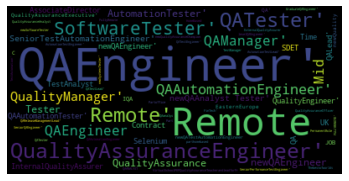

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(modified_job_titles_data)
    
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
    
# bilinear interpolation is a way to spread the words out without them bumping into one another
plt.axis("off")
plt.show()